In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/train.csv")

In [3]:
df2 = pd.read_csv("../data/test.csv")

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
import re
titulo = re.compile(r'\b[a-zA-Z]+\b\.')
def title(full_name):
    x = re.search(titulo, full_name)
    return x.group()

In [6]:
def correct_name(full_name):
    if '(' in full_name:
        x = re.search(r'(?<=[\(])(?P<nome>[\W\w]+)(?=[\)])', full_name)
        #x = re.search(r'(?<=[\(])(?P<nome>[\"\.\-\w\s]+)(?=[\)])', full_name)
        return x.group('nome')
    else:
        surname = re.search(r'^(?P<sobrenome>[\W\w]+)(?=[\,])', full_name)
        name = re.search(r'(?:\b[a-zA-Z]+\b\.\s)(?P<nome>[^\(][\w\W]+)', full_name)
        #surname = re.search(r'^(?P<sobrenome>[\'\-\w\s]+)(?=[\,])', full_name)
        #name = re.search(r'(?:\b[a-zA-Z]+\b\.\s)(?P<nome>[\w\s\"]+)', full_name)
        return name.group('nome') + ' ' + surname.group('sobrenome')

In [7]:
df['Title'] = df['Name'].apply(title)

In [8]:
df['Person'] = df['Name'].apply(correct_name)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,Owen Harris Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,Florence Briggs Thayer
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,Laina Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,Lily May Peel
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,William Henry Allen


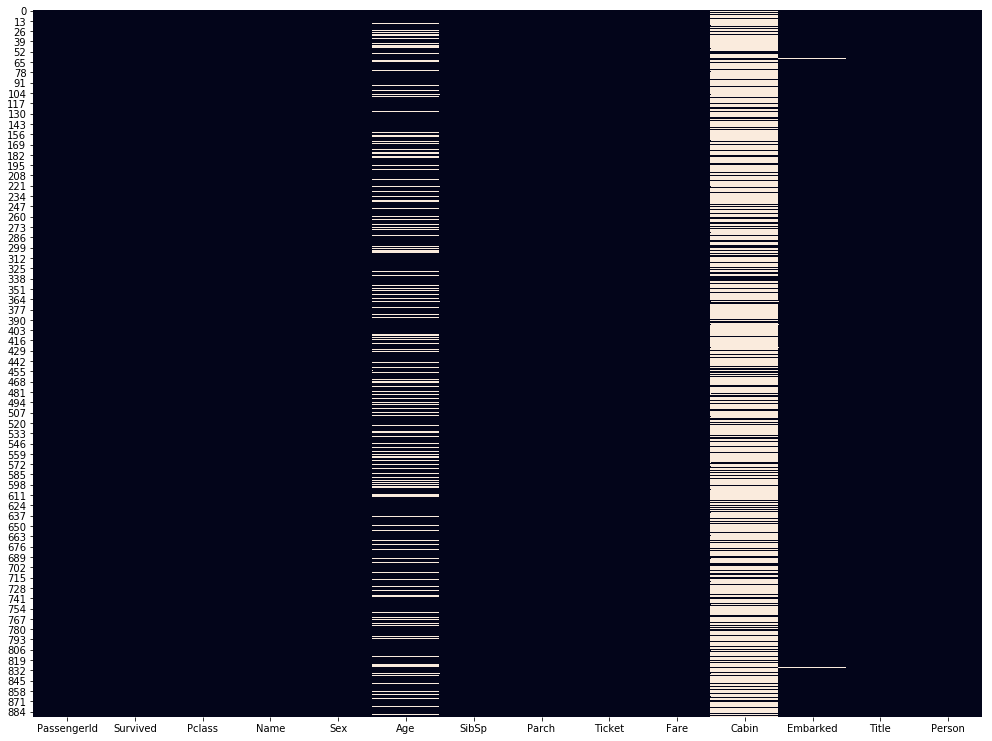

In [10]:
fig = plt.gcf()
fig.set_size_inches(17, 13)
sns.heatmap(df.isnull(), cbar=False)

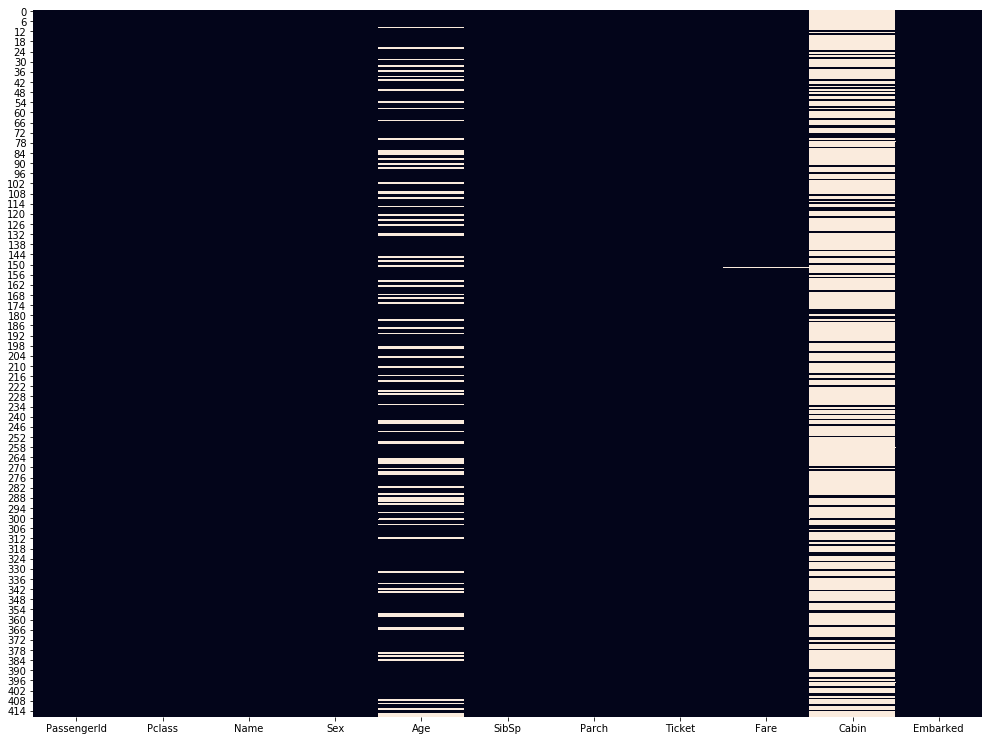

In [11]:
fig2 = plt.gcf()
fig2.set_size_inches(17, 13)
sns.heatmap(df2.isnull(), cbar=False)

In [20]:
df2['Name'].apply(correct_name).sample(20)

370                              Edgar Giles
260          Guillaume Joseph de Messemaeker
192                 Walter John van Billiard
320                   Johan Samuel Andersson
366                             Joseph Caram
153          Hulda Kristina Eugenia Lofqvist
55                               Albert Rice
113                        Katherine Buckley
156                               Ellen Bird
263                    Gertrud Emilia Klasen
229            Samuel James Metcalfe Hocking
216                      Bridget Delia Mahon
148                     John Bertram Crafton
293                         Washington Dodge
128                          Solomon Bowenur
367    Susanna Juhantytar Sanni"" Riihivouri
79                           Elizabeth Doyle
281                    Alfred Edward Peacock
301                           Noel Malachard
368                         Pauline C Boeson
Name: Name, dtype: object

In [13]:
df['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [14]:
df[df['Name'].str.contains("\(")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Person
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,Florence Briggs Thayer
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,Lily May Peel
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs.,Elisabeth Vilhelmina Berg
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs.,Adele Achem
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,Mrs.,Mary D Kingcome
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,Mrs.,Emelia Maria Vandemoortele
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,Mrs.,Selma Augusta Emilia Johansson
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,Mrs.,Marie Eugenie
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S,Mrs.,Johanna Persdotter Larsson
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S,Mrs.,Dorothy Ann Wonnacott


In [15]:
df['Real_Name']

KeyError: 'Real_Name'

In [ ]:
df[['Cabin', 'Embarked', 'Ticket']]

In [ ]:
df[df.Embarked.isna()]

In [ ]:
def family(fname):
    return df[df['Name'].str.contains(fname)].values, df2[df2['Name'].str.contains(fname)].values

In [ ]:
family('Stone')

In [ ]:
df.info() # Método .info

In [ ]:
df.T.head()

In [ ]:
df.dtypes

In [ ]:
df.columns

In [ ]:
df['Pclass']

In [ ]:
males_survived = df[(df["Sex"] == "male") & (df["Survived"] == 1)]

In [ ]:
df.Survived.value_counts(normalize=True)

In [ ]:
type(df.Survived)

In [ ]:
type(df['Survived'])

In [ ]:
df['Survived'].value_counts()

In [ ]:
df2 = pd.read_csv("../data/test.csv")